In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns


# Create an “Academic performance” dataset of students and perform the following 
# operations using Python.  

In [68]:
np.random.seed(42)# will always produce the same random array output. Without setting the seed, the output would differ with each run.
data={
    'Student_id':range(1,101),
    'Age':np.random.choice([18,19,20,21,22],100),
    'Gender':np.random.choice(['Male','Female', 100]),
    'ClassesMissed':np.random.randint(0,11, size=100),
    'Grade':np.random.normal(75,10,100) #mean, std, size
}

In [69]:
df = pd.DataFrame(data)
df

,Student_id,Age,Gender,ClassesMissed,Grade
0,1,21,100,8,82.672968
1,2,22,100,7,63.502074
2,3,20,100,1,67.246639
3,4,22,100,0,82.731409
4,5,22,100,6,66.981722
...,...,...,...,...,...
95,96,20,100,2,75.073064
96,97,22,100,1,88.308813
97,98,19,100,4,84.882026
98,99,19,100,9,77.322962


In [70]:
df['Age'][5]=np.nan
# df['ClassesMissed'][30:35]=20

C:\Users\Sneha Kadam\AppData\Local\Temp\ipykernel_24836\215687894.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'][5]=np.nan


In [71]:
df.head(10)

,Student_id,Age,Gender,ClassesMissed,Grade
0,1,21.0,100,8,82.672968
1,2,22.0,100,7,63.502074
2,3,20.0,100,1,67.246639
3,4,22.0,100,0,82.731409
4,5,22.0,100,6,66.981722
5,6,NaN,100,6,88.840157
6,7,20.0,100,7,89.052053
7,8,20.0,100,4,88.923258
8,9,20.0,100,2,66.193592
9,10,22.0,100,7,75.768949


In [72]:
# null_index=df.index[df['Age'].isnull()]
# null_index.tolist() 

[5]

# 1. Scan all variables for missing values and inconsistencies. If there are missing values 
# and/or inconsistencies, use any of the suitable techniques to deal with them.  

In [43]:
df.isnull().sum()

Student_id       0
Age              1
Gender           0
ClassesMissed    0
Grade            0
dtype: int64

In [44]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df.head(10)

,Student_id,Age,Gender,ClassesMissed,Grade
0,1,21.0,100,8,82.672968
1,2,22.0,100,7,63.502074
2,3,20.0,100,1,67.246639
3,4,22.0,100,0,82.731409
4,5,22.0,100,6,66.981722
5,6,20.0,100,6,88.840157
6,7,20.0,100,7,89.052053
7,8,20.0,100,4,88.923258
8,9,20.0,100,2,66.193592
9,10,22.0,100,7,75.768949


In [45]:
df.isnull().sum()

Student_id       0
Age              0
Gender           0
ClassesMissed    0
Grade            0
dtype: int64

## Scan all numeric variables for outliers. If there are outliers, use any of the suitable 
## techniques to deal with them.  

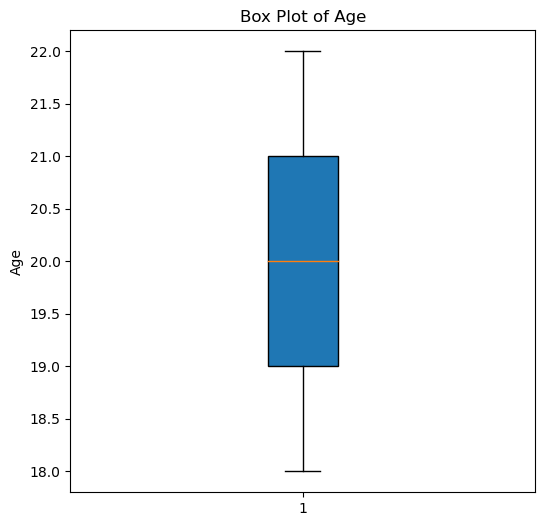

In [48]:
plt.figure(figsize=(6, 6))
plt.boxplot(df['Age'], vert=True, patch_artist=True, flierprops=dict(markerfacecolor='red', marker='o'))
plt.title('Box Plot of Age')
plt.ylabel('Age')

# Display the plot
plt.show()

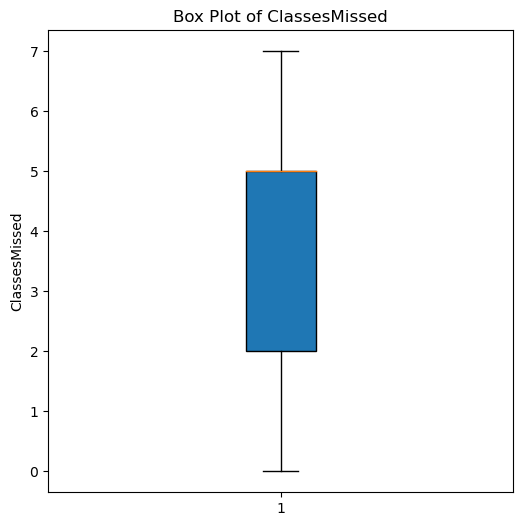

In [62]:
plt.figure(figsize=(6, 6))
plt.boxplot(df['ClassesMissed'], vert=True, patch_artist=True, flierprops=dict(markerfacecolor='red', marker='o'))
plt.title('Box Plot of ClassesMissed')
plt.ylabel('ClassesMissed')
# Display the plot
plt.show()

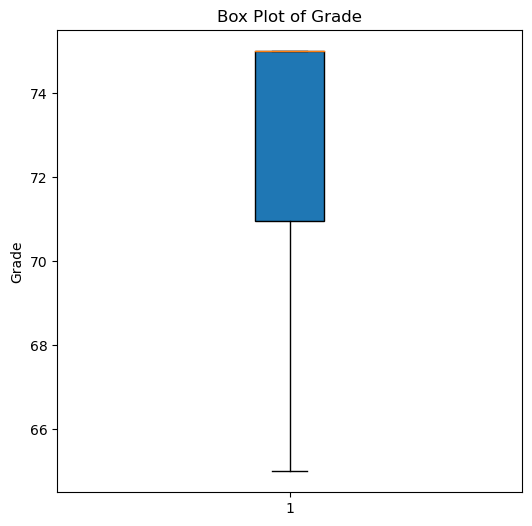

In [61]:
plt.figure(figsize=(6, 6))
plt.boxplot(df['Grade'], vert=True, patch_artist=True, flierprops=dict(markerfacecolor='red', marker='o'))
plt.title('Box Plot of Grade')
plt.ylabel('Grade')
# Display the plot
plt.show()

<AxesSubplot:>

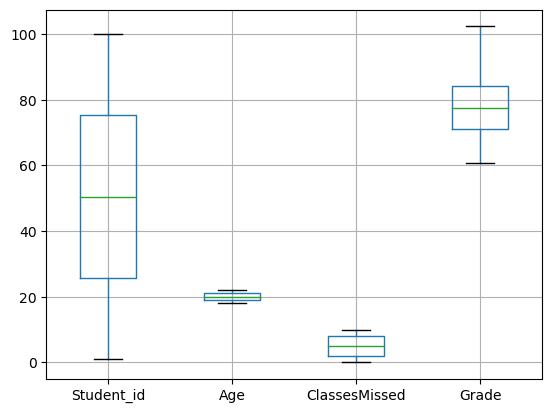

In [51]:
df.boxplot()

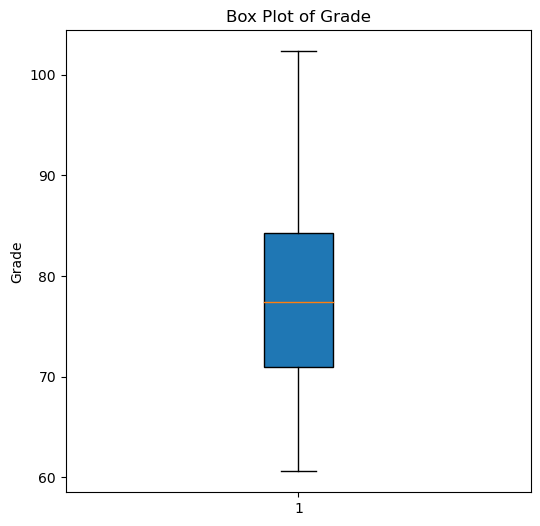

In [52]:
plt.figure(figsize=(6, 6))
plt.boxplot(df['Grade'], vert=True, patch_artist=True, flierprops=dict(markerfacecolor='red', marker='o'))
plt.title('Box Plot of Grade')
plt.ylabel('Grade')
# Display the plot
plt.show()

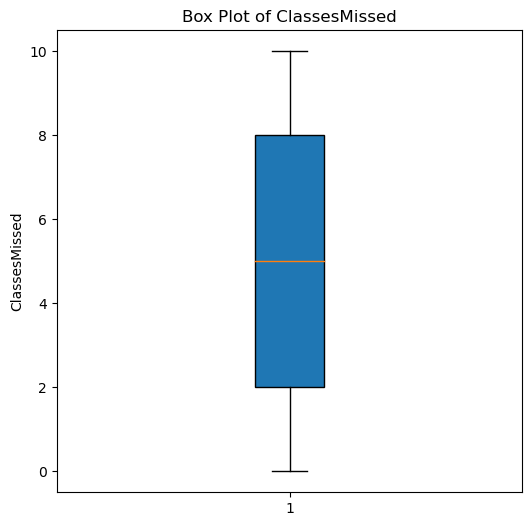

In [53]:
plt.figure(figsize=(6, 6))
plt.boxplot(df['ClassesMissed'], vert=True, patch_artist=True, flierprops=dict(markerfacecolor='red', marker='o'))
plt.title('Box Plot of ClassesMissed')
plt.ylabel('ClassesMissed')
# Display the plot
plt.show()

# Handling the outlier

In [54]:
# Set limits for outliers (for 'MathScore', anything above 100 is an outlier)
df['Age'] = df['Age'].apply(lambda x: 21 if x > 21 else x)


In [55]:
df['ClassesMissed'] = df['ClassesMissed'].apply(lambda x: 5 if x > 7 else x)

In [56]:
df['Grade'] = df['Grade'].apply(lambda x:75 if x > 75 else x)

In [57]:
df['Grade'] = df['Grade'].apply(lambda x:65 if x < 65 else x)

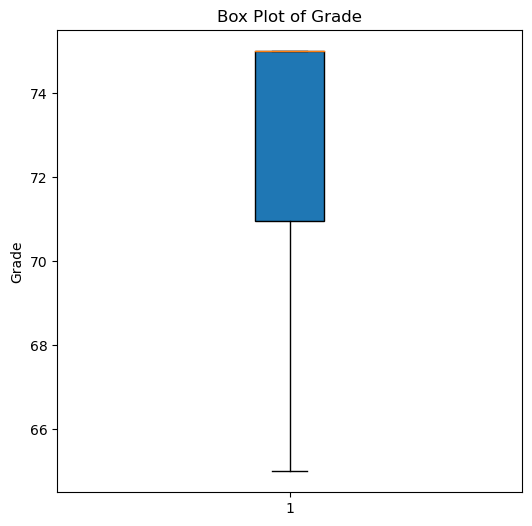

In [58]:
plt.figure(figsize=(6, 6))
plt.boxplot(df['Grade'], vert=True, patch_artist=True, flierprops=dict(markerfacecolor='red', marker='o'))
plt.title('Box Plot of Grade')
plt.ylabel('Grade')
# Display the plot
plt.show()

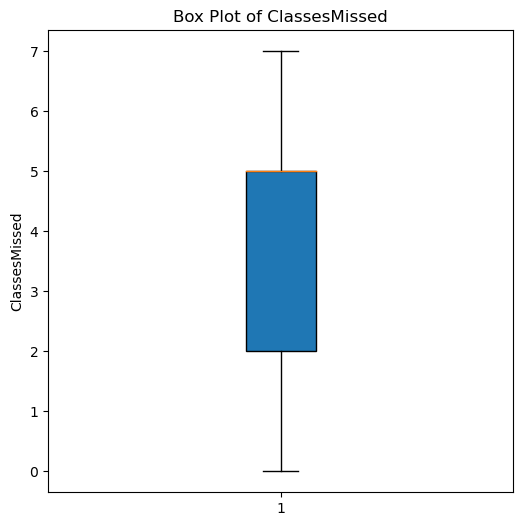

In [59]:
plt.figure(figsize=(6, 6))
plt.boxplot(df['ClassesMissed'], vert=True, patch_artist=True, flierprops=dict(markerfacecolor='red', marker='o'))
plt.title('Box Plot of ClassesMissed')
plt.ylabel('ClassesMissed')
# Display the plot
plt.show()

 ## Apply data transformations on at least one of the variables. The purpose of this 
## transformation should be one of the following reasons: to change the scale for better 
## understanding of the variable, to convert a non-linear relation into a linear one, or to 
## decrease the skewness and convert the distribution into a normal distribution. Reason 
## and document your approach properly.

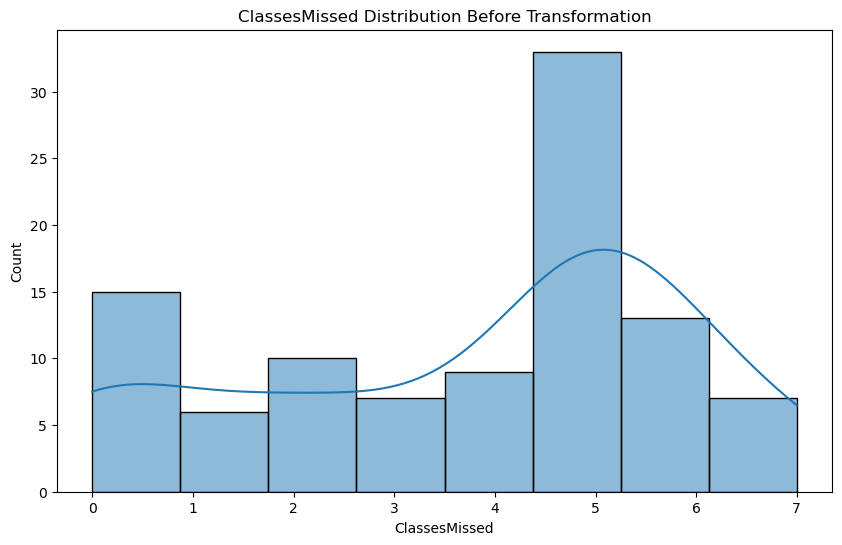

C:\Users\Sneha Kadam\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


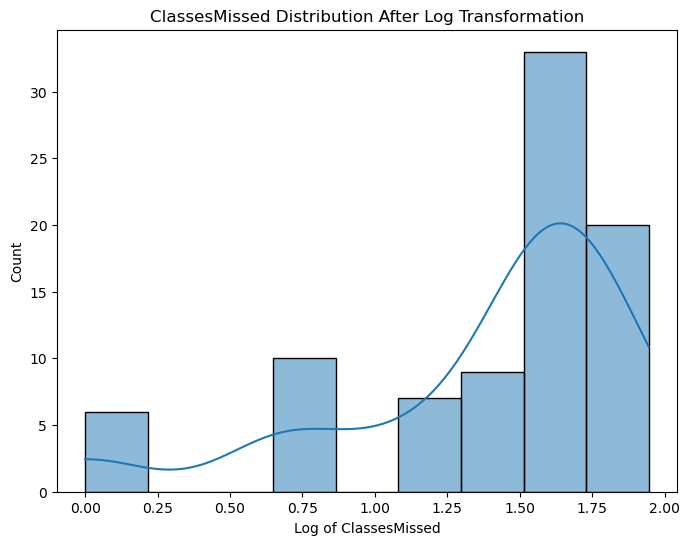

In [60]:
# Visualize the distribution before transformation
plt.figure(figsize=(10, 6))
sns.histplot(df['ClassesMissed'], kde=True)  # 'kde=True' shows the density curve
plt.title('ClassesMissed Distribution Before Transformation')
plt.xlabel('ClassesMissed')
plt.show()

# Apply logarithmic transformation to ClassesMissed
df['LogClassesMissed'] = np.log(df['ClassesMissed'])

# Visualize the distribution after transformation
plt.figure(figsize=(8, 6))
sns.histplot(df['LogClassesMissed'], kde=True)  # Notice the difference
plt.title('ClassesMissed Distribution After Log Transformation')
plt.xlabel('Log of ClassesMissed')
plt.show()
